In [40]:
import tensorflow as tf
from keras.datasets import imdb

In [15]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [16]:
import numpy as np

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences),dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
       #Sets specific indicesof results[i] to 1s
        results[i, sequence] = 1.
    return results

#Vectorized training dat
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [19]:
test_labels[0:5]

array([0, 1, 1, 0, 1])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
test_labels[0:5]

array([0, 1, 1, 0, 1])

##### The input data is now vectors, and the labels are scalars (1s and 0s)

In [34]:
from keras import models
from keras import layers
from keras import optimizers

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
from keras import losses
from keras import metrics

crossentropy is usually the best choice when you’re dealing
with models that output probabilities. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.   

In [43]:
opt = tf.keras.optimizers.RMSprop(lr=0.001)

model.compile(optimizer=opt,
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [44]:
#taking first 10 000 sample as valdiation data fron x and y
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [45]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5193 - acc: 0.7736 - val_loss: 0.3841 - val_acc: 0.8708
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3094 - acc: 0.9050 - val_loss: 0.3244 - val_acc: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2272 - acc: 0.9289 - val_loss: 0.2838 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1756 - acc: 0.9443 - val_loss: 0.2764 - val_acc: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1447 - acc: 0.9549 - val_loss: 0.2827 - val_acc: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1192 - acc: 0.9637 - val_loss: 0.2905 - val_acc: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1009 - acc: 0.9716 - val_loss: 0.3091 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0809 - a

the history objectis a dictionary containing data about everything that happened during training

In [48]:
 history_dict = history.history

In [49]:
 history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

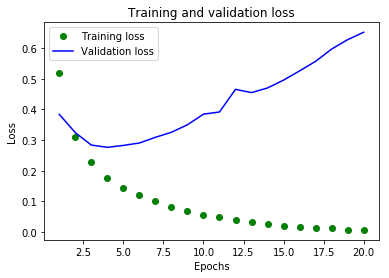

In [52]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

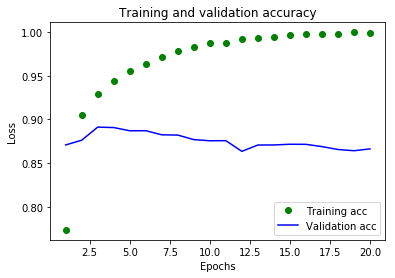

In [55]:
plt.clf()

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

after the second epoch, we're overoptimizing on the training data, and we end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.
In this case, to prevent overfitting, we could stop training after three epochs

In [56]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4580 - accuracy: 0.8259
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2625 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2007 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2943 - accuracy: 0.8832


In [57]:
results

[0.29432356357574463, 0.8832399845123291]

In [58]:
model.predict(x_test)

array([[0.19722128],
       [0.9989947 ],
       [0.9361497 ],
       ...,
       [0.13622987],
       [0.0975121 ],
       [0.7170367 ]], dtype=float32)